<center>
<hr>
<h1>Complessità nei sistemi sociali</h1>
<h2>Laurea Magistrale in Fisica Dei Sistemi Complessi</h2>
<h2>A.A. 2018/19</h2>
<h2>Daniela Paolotti & Michele Tizzoni</h2>
<h3>Notebook 7 - Epidemics on networks.</h3>
<hr>
</center>

We use the Python library ["Epidemics on Networks" developed by Kiss, Miller & Simon](https://github.com/springer-math/Mathematics-of-Epidemics-on-Networks).
The library documentation is [available here](http://epidemicsonnetworks.readthedocs.io/en/latest/). 

In [2]:
import EoN
import networkx as nx
import numpy as np
from collections import defaultdict
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker


Bad key "axes.titlelocation" on line 298 in
/Users/Michele/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [16]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Homogeneous network

We simulate the spread of an SIR on an Erdos-Renyi graph with constant recovery rate.

In [4]:
N=10000
p=0.001
G=nx.fast_gnp_random_graph(N, p)

In [5]:
nx.is_connected(G)

True

In [6]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 10000
Number of edges: 49753
Average degree:   9.9506


---
# The epidemic threshold for this network can be approximated as $\lambda_c = \frac{\mu}{\langle k \rangle}$

In [7]:
mu=0.2

In [8]:
avg_deg1=2*len(G.edges)/N
lc=mu/avg_deg1
print(lc)

0.020099290495045528


# As expected for this network, we have $\langle k^2 \rangle \sim \langle k \rangle^2 + \langle k \rangle$

In [9]:
sum_k2=0
for i in G.nodes():
    k=G.degree(i)
    sum_k2+=k*k
avg_k2=sum_k2/N
print(avg_k2)  

108.8328


In [11]:
avg_deg1**2 + avg_deg1

108.96504035999999

## Simulations of an SIR process
We simulate 100 realizations of a SIR model for increasing values of $\lambda$.

In [12]:
final_size=defaultdict(list)

for lambd in np.geomspace(0.0001, 1.0, 20):
    for r in range(0, 20):
        t, S, I, R = EoN.fast_SIR(G, lambd, mu, rho=0.05)
        
        final_size[lambd].append(R[-1]/N)

In [13]:
homo_net_size=pd.DataFrame.from_dict(final_size)

In [14]:
homo_net_size.head()

,0.0001,0.0001623776739188721,0.00026366508987303583,0.00042813323987193956,0.0006951927961775605,0.0011288378916846883,0.0018329807108324356,0.002976351441631319,0.004832930238571752,0.007847599703514606,0.012742749857031334,0.0206913808111479,0.03359818286283781,0.05455594781168514,0.08858667904100823,0.14384498882876628,0.23357214690901212,0.3792690190732246,0.615848211066026,1.0
0,0.0501,0.0506,0.0505,0.0510,0.0513,0.0532,0.0545,0.0576,0.0648,0.0813,0.1082,0.2537,0.5855,0.8511,0.9409,0.9864,0.9959,0.9987,0.9996,0.9998
1,0.0502,0.0506,0.0507,0.0511,0.0523,0.0532,0.0560,0.0616,0.0653,0.0772,0.1041,0.2260,0.5980,0.8446,0.9481,0.9855,0.9961,0.9991,0.9997,0.9998
2,0.0505,0.0505,0.0505,0.0509,0.0522,0.0529,0.0551,0.0575,0.0636,0.0779,0.1005,0.2664,0.6163,0.8385,0.9489,0.9826,0.9957,0.9990,0.9998,0.9998
3,0.0504,0.0504,0.0505,0.0516,0.0515,0.0518,0.0554,0.0592,0.0657,0.0776,0.1109,0.2513,0.6013,0.8358,0.9509,0.9847,0.9963,0.9989,0.9997,0.9997
4,0.0502,0.0506,0.0506,0.0506,0.0517,0.0536,0.0555,0.0563,0.0631,0.0786,0.1061,0.2440,0.6012,0.8450,0.9496,0.9836,0.9961,0.9983,0.9997,0.9998


Text(0.5,0,'$\\lambda$')

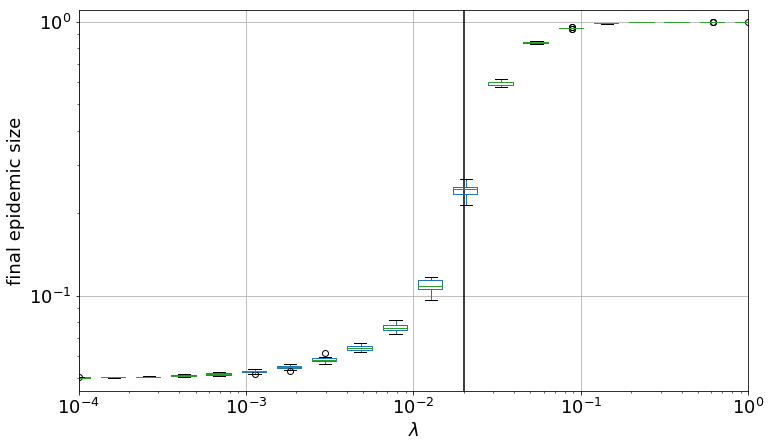

In [17]:
plt.figure(figsize=(12,7))

homo_net_size.boxplot(positions=np.array(homo_net_size.columns), 
                      widths=np.array(homo_net_size.columns)/3)
plt.vlines(x=lc, ymin=0.045, ymax=1.1)

plt.xscale('log')
plt.yscale('log')
plt.xlim(0.0001, 1.0)
plt.ylim(0.045, 1.1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('final epidemic size', fontsize=18)
plt.xlabel('$\lambda$', fontsize=18)

# Barabàsi-Albert model network

In [16]:
N=10000
AB=nx.barabasi_albert_graph(N, 5)

In [17]:
nx.is_connected(AB)

True

In [18]:
print(nx.info(AB))

Name: 
Type: Graph
Number of nodes: 10000
Number of edges: 49975
Average degree:   9.9950


In [19]:
sum_k2=0
for i in AB.nodes():
    k=AB.degree(i)
    sum_k2+=k*k
avg_k2=sum_k2/N
print(avg_k2)    

270.7546


In [20]:
avg_deg=2*len(AB.edges)/N
print(avg_deg)

9.995


# The threshold can be approximated as $\lambda_c \sim \mu \frac{\langle k \rangle}{\langle k^2 \rangle - \langle k \rangle}$ 

In [21]:
lambda_c=mu*avg_deg/(avg_k2-avg_deg)
print(lambda_c)

0.007666064835196863


In [22]:
lc/lambda_c

2.6020829927840188

## Simulations of an SIR process
We simulate 100 realizations of a SIR model for increasing values of $\lambda$

In [17]:
final_size_AB=defaultdict(list)

for lambd in np.geomspace(0.0001, 1.0, 20):
    for r in range(0, 100):
        
        t, S, I, R = EoN.fast_SIR(AB, lambd, mu, rho=0.05)
        
        final_size_AB[lambd].append(R[-1]/N)

In [18]:
sf_net_size=pd.DataFrame.from_dict(final_size_AB)

In [19]:
sf_net_size.tail()

,0.0001,0.0001623776739188721,0.00026366508987303583,0.00042813323987193956,0.0006951927961775605,0.0011288378916846883,0.0018329807108324356,0.002976351441631319,0.004832930238571752,0.007847599703514606,0.012742749857031334,0.0206913808111479,0.03359818286283781,0.05455594781168514,0.08858667904100823,0.14384498882876628,0.23357214690901212,0.3792690190732246,0.615848211066026,1.0
95,0.0502,0.0506,0.0507,0.0514,0.0524,0.0535,0.0556,0.0609,0.0658,0.1060,0.1816,0.3447,0.5652,0.7624,0.9068,0.9693,0.9912,0.9982,0.9996,1.0000
96,0.0502,0.0506,0.0505,0.0507,0.0523,0.0531,0.0565,0.0581,0.0680,0.0939,0.2026,0.3577,0.5897,0.7850,0.9041,0.9663,0.9923,0.9980,0.9996,0.9999
97,0.0501,0.0507,0.0508,0.0511,0.0521,0.0527,0.0545,0.0594,0.0686,0.1034,0.1966,0.3407,0.5720,0.7669,0.9037,0.9679,0.9920,0.9987,0.9996,1.0000
98,0.0505,0.0502,0.0506,0.0505,0.0531,0.0533,0.0554,0.0591,0.0679,0.0902,0.1592,0.3729,0.5796,0.7866,0.9087,0.9699,0.9893,0.9983,0.9995,0.9999
99,0.0503,0.0500,0.0508,0.0510,0.0517,0.0534,0.0552,0.0600,0.0734,0.1038,0.1726,0.3624,0.5774,0.7777,0.9068,0.9693,0.9916,0.9985,0.9998,1.0000


Text(0.5,0,'$\\lambda$')

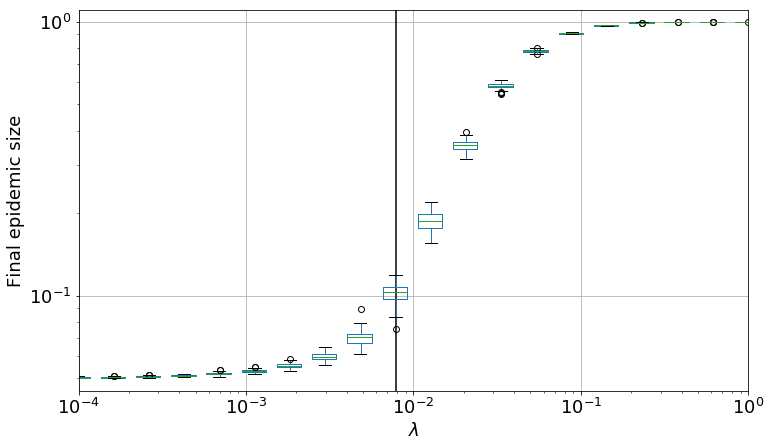

In [44]:
plt.figure(figsize=(12,7))

#homo_net_size.boxplot(positions=np.array(homo_net_size.columns), widths=np.array(homo_net_size.columns)/3 )

plt.vlines(x=lambda_c, ymin=0.04, ymax=1.1)
sf_net_size.boxplot(positions=np.array(sf_net_size.columns), widths=np.array(sf_net_size.columns)/3)

plt.yscale('log')
plt.xscale('log')
plt.xlim(0.0001, 1.0)
plt.ylim(0.045, 1.1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('final epidemic size', fontsize=18)
plt.xlabel('$\lambda$', fontsize=18)

# Configuration model network

We can use the configuration model to generate a network with a given power-law degree distribution. By setting $\gamma=2.1$, we expect to see more fluctuations in the degree distribution.

We create a function that samples from a power-law distribution between $k_{min}$ and $k_{max}$ with exponent $\gamma$

In [16]:
def get_activity(x0,x1,g):
    y=random.uniform(0,1)
    e=g+1.
    a=((x1**e-x0**e)*y+x0**e)**(1./e)
    return a

In [31]:
N=10000
kmin=2
kmax=N-1
a=[]
for i in range(N):
    act=get_activity(kmin,kmax,-2.1)
    a.append(int(round(act)))

if sum(a)%2==0:
    G1=nx.configuration_model(a)
else:
    a[-1]+=1
    G1=nx.configuration_model(a)

In [18]:
nx.is_connected(G1)

True

In [19]:
print(nx.info(G1))

Name: 
Type: MultiGraph
Number of nodes: 10000
Number of edges: 62176
Average degree:  12.4352


In [20]:
G1=nx.Graph(G1)

In [21]:
G1.remove_edges_from(G1.selfloop_edges())

In [22]:
print(nx.info(G1))

Name: 
Type: Graph
Number of nodes: 10000
Number of edges: 50205
Average degree:  10.0410


In [23]:
nx.is_connected(G1)

True

In [24]:
sum_k2=0
for i in G1.nodes():
    k=G1.degree(i)
    sum_k2+=k*k
avg_k2=sum_k2/N
print(avg_k2)

2719.6674


In [25]:
avg_deg=2*len(G1.edges)/N
print(avg_deg)

10.041


In [26]:
lambda_c1=mu*avg_deg/(avg_k2-avg_deg)
print(lambda_c1)

0.0007411353830919274


In [27]:
lc/lambda_c1

26.867406357946752

## Simulations of an SIR process
We simulate 100 realizations of a SIR model for increasing values of $\lambda$

In [28]:
final_size_conf=defaultdict(list)

for lambd in np.geomspace(0.0001, 1.0, 20):
    for r in range(0, 20):
        
        t, S, I, R = EoN.fast_SIR(G1, lambd, mu, rho=0.05)
        
        final_size_conf[lambd].append(R[-1]/N)

In [29]:
conf_net_size=pd.DataFrame.from_dict(final_size_conf)

Text(0.5,0,'$\\lambda$')

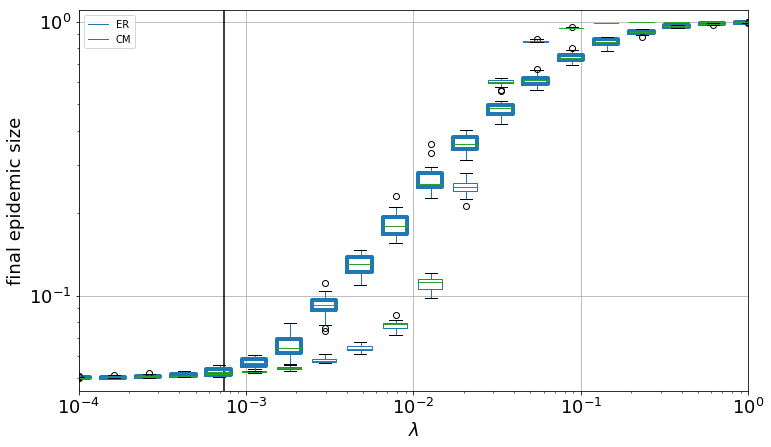

In [30]:
plt.figure(figsize=(12,7))

boxprops1 = dict(linestyle='-', linewidth=4, color='b')

homo_net_size.boxplot(positions=np.array(homo_net_size.columns), widths=np.array(homo_net_size.columns)/3)

conf_net_size.boxplot(positions=np.array(conf_net_size.columns), widths=np.array(conf_net_size.columns)/3, boxprops=boxprops1)

plt.vlines(x=lambda_c1, ymin=0.04, ymax=1.1)
plt.legend(['ER','CM'])
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.0001, 1.0)
plt.ylim(0.045, 1.1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('final epidemic size', fontsize=18)
plt.xlabel('$\lambda$', fontsize=18)